In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/100_days_ml/DATA/salary_data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


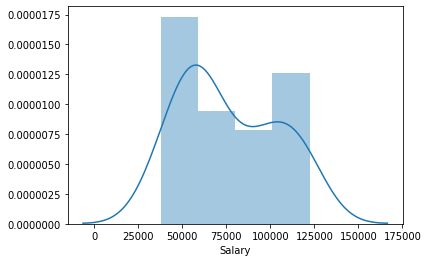

In [4]:
sns.distplot(df.Salary)

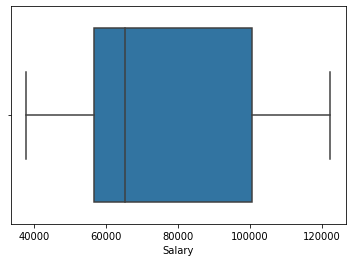

In [5]:
sns.boxplot(df.Salary)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


for classification lets divide salary greater than or equal to 65,000 as 1 meaning high salary
Less than 65,000 as 0 meaning low salary

In [7]:
df['sal_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['Salary'] >= 65000, 'sal_cat'] = 1
    col.loc[col['Salary'] < 65000, 'sal_cat'] = 0

In [8]:
df = df.drop(['Salary'], axis =1)

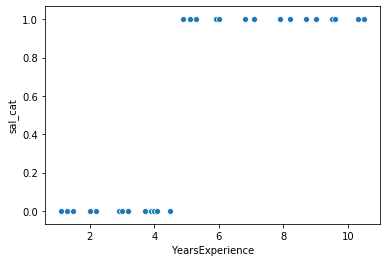

In [9]:
sns.scatterplot(df.YearsExperience, df.sal_cat)

In [10]:
y =np.array(df.sal_cat)
X = np.array(df.YearsExperience)

In [11]:
#X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [12]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [13]:
alpha = 0.003
m = len(df)
lr_ratio = alpha/m

In [14]:
theta0 = 0.5
theta1 = 0.5

cf = []

itr = []

theta0_list =  []
theta1_list =  []

In [15]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [16]:
for i in range(0,100000):
    prediction = sigmoid (theta0 + theta1 * X)
    
    temp0 = theta0 - lr_ratio*(np.sum((prediction - y)))
    temp1 = theta1 - lr_ratio*(np.sum(((prediction - y)*X)))
                               

    
    theta0_list.append(theta0)
    theta1_list.append(theta1)
    
    theta0 = temp0
    theta1 = temp1
    
    
                            
    error = (-y * np.log(prediction)) - ((1-y)*np.log(1-prediction))
    cf.append( 1/m * sum(error))
    itr.append(i)

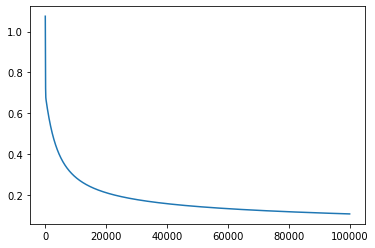

In [17]:
plt.plot(itr,cf)

In [18]:
theta = np.array([0.5,0.5]).reshape(2,1)

In [19]:
theta0

-8.930618553731104

In [20]:
yrs_of_exp = [1,2,3,4,5,6,7]

In [23]:
for i in yrs_of_exp:
    e = theta0 + theta1 * i
    if e<0:
        print('pred = ', 0)
        print(" val =", e )
    else:
        print('pred = ', 1)
        print(" val =", e )

pred =  0
 val = -7.035105393145469
pred =  0
 val = -5.139592232559833
pred =  0
 val = -3.2440790719741983
pred =  0
 val = -1.3485659113885626
pred =  1
 val = 0.546947249197073
pred =  1
 val = 2.442460409782708
pred =  1
 val = 4.337973570368344
